**Sumber Data:**

Inflasi: https://jatim.bps.go.id/id/statistics-table/2/MSMy/inflasi-bulanan.html

Harga Pangan: https://www.bi.go.id/hargapangan/TabelHarga/PasarTradisionalDaerah

**Dataset**:

https://drive.google.com/drive/folders/1ueK89aFWi2mK17oyOmOWGEgeQ_aPtEfR?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data Inflasi
path_inflasi_2023 = '/content/drive/MyDrive/Dataset/Data/inflasi_2023.xlsx'
path_inflasi_2024 = '/content/drive/MyDrive/Dataset/Data/inflasi_2024.xlsx'
path_harga = '/content/drive/MyDrive/Dataset/Data/harga_pangan.xlsx'

def parse_inflasi_file(file_path, year_name):
   print(f"Memproses data inflasi {year_name}...")

   raw = pd.read_excel(file_path, header=None)
   col_bulan = raw.iloc[0, 0]
   col_inflasi = raw.iloc[1, 1]
   tahun = int(raw.iloc[2, 1])

   df = raw.iloc[3:].copy()
   df = df.iloc[:, :2]
   df.columns = [col_bulan, col_inflasi]
   df['Tahun'] = tahun

   # Cleaning
   df = df.dropna(subset=[col_bulan, col_inflasi])
   df[col_inflasi] = df[col_inflasi].astype(float)
   print(f" Data {year_name}: {len(df)} baris")

   return df

df_inflasi_2023 = parse_inflasi_file(path_inflasi_2023, "2023")
df_inflasi_2024 = parse_inflasi_file(path_inflasi_2024, "2024")
df_inflasi = pd.concat([df_inflasi_2023, df_inflasi_2024], ignore_index=True)

old_col = [c for c in df_inflasi.columns if 'Inflasi' in c and c != 'Tahun'][0]
df_inflasi = df_inflasi.rename(columns={old_col: 'Inflasi_bulanan'})

print(f"\nTotal data inflasi gabungan: {len(df_inflasi)} baris")
print(f"Kolom: {list(df_inflasi.columns)}")

Memproses data inflasi 2023...
 Data 2023: 12 baris
Memproses data inflasi 2024...
 Data 2024: 12 baris

Total data inflasi gabungan: 24 baris
Kolom: ['Bulan', 'Inflasi_bulanan', 'Tahun']


In [ ]:
# Load Harga Pangan
print(f"Memproses data harga pangan")
df_harga = pd.read_excel(path_harga)
print(f"  Data harga pangan: {len(df_harga)} baris, {len(df_harga.columns)} kolom")

Memproses data harga pangan
  Data harga pangan: 31 baris, 26 kolom


In [ ]:
print(df_inflasi.head(10))

print(f"\nInfo Dataset:")
print(df_inflasi.info())

print(f"\nStatistik Deskriptif:")
print(df_inflasi.describe())

       Bulan  Inflasi_bulanan  Tahun
0    Januari             0.36   2023
1   Februari             0.10   2023
2      Maret             0.39   2023
3      April             0.30   2023
4        Mei             0.18   2023
5       Juni             0.10   2023
6       Juli             0.15   2023
7    Agustus             0.11   2023
8  September             0.32   2023
9    Oktober             0.27   2023

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bulan            24 non-null     object 
 1   Inflasi_bulanan  24 non-null     float64
 2   Tahun            24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 708.0+ bytes
None

Statistik Deskriptif:
       Inflasi_bulanan        Tahun
count        24.000000    24.000000
mean          0.182917  2023.500000
std           0.237203     0.510754
min    

In [ ]:
print(df_harga.head(10))
print(f"\nInfo Dataset:")
print(df_harga.info())
print(f"\nKolom yang tersedia:")
for i, col in enumerate(df_harga.columns, 1):
    print(f"{i}. {col}")

    No            Komoditas (Rp) 02/ 01/ 2023 01/ 02/ 2023 01/ 03/ 2023  \
0    I                     Beras       11,700       12,050       12,050   
1    1    Beras Kualitas Bawah I       10,750       11,100       11,100   
2    2   Beras Kualitas Bawah II       10,850       11,200       11,250   
3    3   Beras Kualitas Medium I       11,700       12,050       12,100   
4    4  Beras Kualitas Medium II       11,250       11,650       11,600   
5    5    Beras Kualitas Super I       12,650       12,950       12,950   
6    6   Beras Kualitas Super II       12,250       12,650       12,550   
7   II               Daging Ayam       31,750       29,000       30,700   
8    1     Daging Ayam Ras Segar       31,750       29,000       30,700   
9  III               Daging Sapi      116,550      116,550      116,550   

  03/ 04/ 2023 01/ 05/ 2023 01/ 06/ 2023 03/ 07/ 2023 01/ 08/ 2023  ...  \
0       12,100       12,150       12,150       12,100       12,150  ...   
1       11,050       11,

# Preprocessing

## Data Inflasi

In [ ]:
# Cek missing values
missing_inflasi = df_inflasi.isnull().sum()
print(f"Missing values sebelum cleaning:")
print(missing_inflasi)

# Cek duplikat
dup_inflasi = df_inflasi.duplicated().sum()
print(f"\nDuplikat data: {dup_inflasi}")

df_inflasi['Bulan'] = df_inflasi['Bulan'].str.strip().str.title()
df_inflasi['Periode'] = df_inflasi['Bulan'] + ' ' + df_inflasi['Tahun'].astype(str)

print(f" Data inflasi setelah cleaning: {len(df_inflasi)} baris")

Missing values sebelum cleaning:
Bulan              0
Inflasi_bulanan    0
Tahun              0
dtype: int64

Duplikat data: 0
 Data inflasi setelah cleaning: 24 baris


In [ ]:
df_inflasi = df_inflasi.drop(columns=['Periode'])

In [ ]:
df_inflasi.head()

,Bulan,Inflasi_bulanan,Tahun
0,Januari,0.36,2023
1,Februari,0.10,2023
2,Maret,0.39,2023
3,April,0.30,2023
4,Mei,0.18,2023


## Data Harga Pangan

In [ ]:
df = df_harga.copy()

df.columns = [c.replace(" ", "") for c in df.columns]
df = df.drop(columns=['No'])

In [ ]:
# Transformasi dari wide ke long
df_long = df.melt(
    id_vars=['Komoditas(Rp)'],
    var_name='Tanggal',
    value_name='Harga'
)

# Hapus karakter non-digit/koma
df_long['Harga'] = df_long['Harga'].astype(str).str.replace(r'[^\d,]', '', regex=True).str.replace(',', '', regex=False)
df_long['Harga'] = pd.to_numeric(df_long['Harga'], errors='coerce')

In [ ]:
# Cleaning Kolom Tanggal dan Ekstraksi Komponen
df_long['Tanggal'] = pd.to_datetime(df_long['Tanggal'], format='%d/%m/%Y', errors='coerce')
df_long = df_long.dropna(subset=['Tanggal', 'Harga']).reset_index(drop=True)

In [ ]:
df_long['Tahun'] = df_long['Tanggal'].dt.year
df_long['Bulan'] = df_long['Tanggal'].dt.month

# Pemetaan Bulan
bulan_map = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
df_long['Bulan'] = df_long['Bulan'].map(bulan_map)

df_long

,Komoditas(Rp),Tanggal,Harga,Tahun,Bulan
0,Beras,2023-01-02,11700,2023,Januari
1,Beras Kualitas Bawah I,2023-01-02,10750,2023,Januari
2,Beras Kualitas Bawah II,2023-01-02,10850,2023,Januari
3,Beras Kualitas Medium I,2023-01-02,11700,2023,Januari
4,Beras Kualitas Medium II,2023-01-02,11250,2023,Januari
...,...,...,...,...,...
739,Minyak Goreng Kemasan Bermerk 1,2024-12-02,19200,2024,Desember
740,Minyak Goreng Kemasan Bermerk 2,2024-12-02,19000,2024,Desember
741,Gula Pasir,2024-12-02,17350,2024,Desember
742,Gula Pasir Kualitas Premium,2024-12-02,18150,2024,Desember


In [ ]:
# Konversi harga ke numerik
df_long['Harga'] = pd.to_numeric(df_long['Harga'], errors='coerce')
df_inflasi['Inflasi_bulanan'] = pd.to_numeric(df_inflasi['Inflasi_bulanan'], errors='coerce')

In [ ]:
print("Data harga:", df_long.shape)
print("Data inflasi:", df_inflasi.shape)

Data harga: (744, 5)
Data inflasi: (24, 3)


In [ ]:
import os

# Data Cleaning Inflasi
output = "Data_Cleaned_Inflasi.csv"
df_inflasi.to_csv(output, index=False, encoding='utf-8')
print(f"Data cleaned harga pangan berhasil disimpan ke: {os.path.abspath(output)}")

# Data Cleaning Harga Pangan
output = "Data_Cleaned_Harga_Pangan.csv"
df_long.to_csv(output, index=False, encoding='utf-8')
print(f"Data cleaned harga pangan berhasil disimpan ke: {os.path.abspath(output)}")

Data cleaned harga pangan berhasil disimpan ke: /content/Data_Cleaned_Inflasi.csv
Data cleaned harga pangan berhasil disimpan ke: /content/Data_Cleaned_Harga_Pangan.csv


# Integrasi Data

In [ ]:
# Merge berdasarkan Tahun dan Bulan
df_merged = pd.merge(
    df_long,
    df_inflasi,
    on=['Tahun', 'Bulan'],
    how='left'
)

In [ ]:
# Cek semua baris harga berhasil mendapatkan inflasi
missing_inf = df_merged['Inflasi_bulanan'].isnull().sum()

print("Total baris:", len(df_merged))
print("Baris tanpa inflasi:", missing_inf)

df_merged.head()

Total baris: 744
Baris tanpa inflasi: 0


,Komoditas(Rp),Tanggal,Harga,Tahun,Bulan,Inflasi_bulanan
0,Beras,2023-01-02,11700,2023,Januari,0.36
1,Beras Kualitas Bawah I,2023-01-02,10750,2023,Januari,0.36
2,Beras Kualitas Bawah II,2023-01-02,10850,2023,Januari,0.36
3,Beras Kualitas Medium I,2023-01-02,11700,2023,Januari,0.36
4,Beras Kualitas Medium II,2023-01-02,11250,2023,Januari,0.36


In [ ]:
import os

output = "Data_Hasil_Integrasi.csv"
df_merged.to_csv(output, index=False, encoding='utf-8')
print(f"Data hasil integrasi berhasil disimpan ke: {os.path.abspath(output)}")

Data hasil integrasi berhasil disimpan ke: /content/Data_Hasil_Integrasi.csv


# Feature Engineering

In [ ]:
df_merged = df_merged.rename(columns={
    'Komoditas(Rp)': 'Komoditas',
    'Inflasi_bulanan': 'Inflasi_Bln'
})

In [ ]:
# Harga Bulan Sebelumnya (Harga_prev)
df_merged['Harga_prev'] = df_merged.groupby('Komoditas')['Harga'].shift(1)

# Selisih Harga Bulanan (Harga_selisih)
df_merged['Harga_selisih'] = df_merged['Harga'] - df_merged['Harga_prev']

# 3-Month Moving Average (Rata-rata Bergerak 3 Bulan)
df_merged['Harga_MA3'] = df_merged.groupby('Komoditas')['Harga'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

In [ ]:
# Klasifikasi tren harga berdasarkan Harga_selisih
df_merged['Tren'] = df_merged['Harga_selisih'].apply(
    lambda x: 'Naik' if x > 0 else ('Turun' if x < 0 else 'Tetap' if x == 0 else 'N/A')
)

print("Kolom baru: Harga_selisih, Harga_MA3, Tren")
df_merged.tail()

Kolom baru: Harga_selisih, Harga_MA3, Tren


,Komoditas,Tanggal,Harga,Tahun,Bulan,Inflasi_Bln,Harga_prev,Harga_selisih,Harga_MA3,Tren
739,Minyak Goreng Kemasan Bermerk 1,2024-12-02,19200,2024,Desember,0.46,18900,300,18900,Naik
740,Minyak Goreng Kemasan Bermerk 2,2024-12-02,19000,2024,Desember,0.46,18700,300,18767,Naik
741,Gula Pasir,2024-12-02,17350,2024,Desember,0.46,17400,-50,17367,Turun
742,Gula Pasir Kualitas Premium,2024-12-02,18150,2024,Desember,0.46,18150,0,18150,Tetap
743,Gula Pasir Lokal,2024-12-02,16750,2024,Desember,0.46,16850,-100,16800,Turun


In [ ]:
df_merged['Harga_prev'] = df_merged['Harga_prev'].round(0).astype('Int64')
df_merged['Harga_selisih'] = df_merged['Harga_selisih'].round(0).astype('Int64')
df_merged['Harga_MA3'] = df_merged['Harga_MA3'].round(0).astype('Int64')

df_merged.tail()

,Komoditas,Tanggal,Harga,Tahun,Bulan,Inflasi_Bln,Harga_prev,Harga_selisih,Harga_MA3,Tren
739,Minyak Goreng Kemasan Bermerk 1,2024-12-02,19200,2024,Desember,0.46,18900,300,18900,Naik
740,Minyak Goreng Kemasan Bermerk 2,2024-12-02,19000,2024,Desember,0.46,18700,300,18767,Naik
741,Gula Pasir,2024-12-02,17350,2024,Desember,0.46,17400,-50,17367,Turun
742,Gula Pasir Kualitas Premium,2024-12-02,18150,2024,Desember,0.46,18150,0,18150,Tetap
743,Gula Pasir Lokal,2024-12-02,16750,2024,Desember,0.46,16850,-100,16800,Turun


In [ ]:
df_merged

,Komoditas,Tanggal,Harga,Tahun,Bulan,Inflasi_Bln,Harga_prev,Harga_selisih,Harga_MA3,Tren
0,Beras,2023-01-02,11700,2023,Januari,0.36,<NA>,<NA>,11700,N/A
1,Beras Kualitas Bawah I,2023-01-02,10750,2023,Januari,0.36,<NA>,<NA>,10750,N/A
2,Beras Kualitas Bawah II,2023-01-02,10850,2023,Januari,0.36,<NA>,<NA>,10850,N/A
3,Beras Kualitas Medium I,2023-01-02,11700,2023,Januari,0.36,<NA>,<NA>,11700,N/A
4,Beras Kualitas Medium II,2023-01-02,11250,2023,Januari,0.36,<NA>,<NA>,11250,N/A
...,...,...,...,...,...,...,...,...,...,...
739,Minyak Goreng Kemasan Bermerk 1,2024-12-02,19200,2024,Desember,0.46,18900,300,18900,Naik
740,Minyak Goreng Kemasan Bermerk 2,2024-12-02,19000,2024,Desember,0.46,18700,300,18767,Naik
741,Gula Pasir,2024-12-02,17350,2024,Desember,0.46,17400,-50,17367,Turun
742,Gula Pasir Kualitas Premium,2024-12-02,18150,2024,Desember,0.46,18150,0,18150,Tetap


In [ ]:
output = "Data_Hasil_Feature_Engineering.csv"
df_merged.to_csv(output, index=False, encoding='utf-8')
print(f"Data hasil feature engineering berhasil disimpan ke: {os.path.abspath(output)}")

Data hasil feature engineering berhasil disimpan ke: /content/Data_Hasil_Feature_Engineering.csv


# Analisis Data Eksploratif

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Komoditas      744 non-null    object        
 1   Tanggal        744 non-null    datetime64[ns]
 2   Harga          744 non-null    int64         
 3   Tahun          744 non-null    int32         
 4   Bulan          744 non-null    object        
 5   Inflasi_Bln    744 non-null    float64       
 6   Harga_prev     713 non-null    Int64         
 7   Harga_selisih  713 non-null    Int64         
 8   Harga_MA3      744 non-null    Int64         
 9   Tren           744 non-null    object        
dtypes: Int64(3), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 57.5+ KB


In [ ]:
# Statistik Deskriptif Variabel Kuantitatif (Harga, Inflasi, Perubahan)
print("Statistik Deskriptif Variabel Kunci Harga")

# Menampilkan statistik Harga_Rata3Bln, Harga_selisih, dan Inflasi_Bln
print(df_merged[['Harga', 'Harga_MA3', 'Harga_selisih', 'Inflasi_Bln']].describe().transpose())

Statistik Deskriptif Variabel Kunci Harga
               count          mean           std      min      25%      50%  \
Harga          744.0  33511.827957  30336.795348  10750.0  15300.0  23725.0   
Harga_MA3      744.0  33563.557796  30048.779814  10750.0  15067.0  25133.5   
Harga_selisih  713.0    -49.298738   6419.775523 -40300.0   -350.0     50.0   
Inflasi_Bln    744.0      0.182917      0.232364    -0.37    0.085     0.21   

                    75%       max  
Harga           34662.5  127450.0  
Harga_MA3      35124.75  126967.0  
Harga_selisih     550.0   39000.0  
Inflasi_Bln        0.33      0.64  


In [ ]:
print("Distribusi Frekuensi Tren Harga")
# Menghitung persentase kejadian tren (Naik/Turun/Tetap)
print(df_merged['Tren'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Distribusi Frekuensi Tren Harga
Tren
Naik     48.25%
Turun    38.71%
Tetap     8.87%
N/A       4.17%
Name: proportion, dtype: object


In [ ]:
# Analisis Tren Harga Rata-Rata per Komoditas
print("Harga Rata-Rata (Mean) dan Volatilitas (Std Dev) per Komoditas")

# Ubah format angka menjadi integer
pd.options.display.float_format = '{:,.0f}'.format

# Kelompok data berdasarkan komoditas pada rata-rata dan standar deviasi
df_komoditas_summary = df_merged.groupby('Komoditas').agg(
    Harga_Rata_Total=('Harga', 'mean'),
    Selisih_Rata_Bln=('Harga_selisih', 'mean'),
    Volatilitas_Harga=('Harga', 'std'),
    Total_Titik_Data=('Harga', 'count')
).sort_values(by='Harga_Rata_Total', ascending=False).round(2)
print(df_komoditas_summary)

Harga Rata-Rata (Mean) dan Volatilitas (Std Dev) per Komoditas
                                 Harga_Rata_Total  Selisih_Rata_Bln  \
Komoditas                                                             
Daging Sapi Kualitas 1                    124,648               235   
Daging Sapi                               119,033               230   
Daging Sapi Kualitas 2                    113,404               226   
Cabai Rawit Merah                          41,369            -1,604   
Cabai Merah Besar                          38,017              -259   
Cabai Merah Keriting                       37,521              -804   
Cabai Merah                                37,258              -441   
Cabai Rawit                                34,885            -1,293   
Daging Ayam                                33,933               128   
Daging Ayam Ras Segar                      33,933               128   
Bawang Putih                               33,402               711   
Bawang Putih U

In [ ]:
# Volatilitas Tertinggi (Paling Tidak Stabil)
df_tertinggi = df_komoditas_summary.sort_values(by='Volatilitas_Harga', ascending=False).head(3)
print("KOMODITAS DENGAN VOLATILITAS TERTINGGI (Paling Tidak Stabil)")
print(df_tertinggi[['Harga_Rata_Total', 'Volatilitas_Harga']])


# Volatilitas Terendah (Paling Stabil)
df_terendah = df_komoditas_summary.sort_values(by='Volatilitas_Harga', ascending=True).head(3)
print("\nKOMODITAS DENGAN VOLATILITAS TERENDAH (Paling Stabil)")
print(df_terendah[['Harga_Rata_Total', 'Volatilitas_Harga']])

KOMODITAS DENGAN VOLATILITAS TERTINGGI (Paling Tidak Stabil)
                   Harga_Rata_Total  Volatilitas_Harga
Komoditas                                             
Cabai Merah Besar            38,017             17,869
Cabai Rawit Merah            41,369             16,944
Cabai Merah                  37,258             16,496

KOMODITAS DENGAN VOLATILITAS TERENDAH (Paling Stabil)
                                 Harga_Rata_Total  Volatilitas_Harga
Komoditas                                                           
Minyak Goreng Kemasan Bermerk 2            18,835                206
Minyak Goreng                              18,067                300
Minyak Goreng Kemasan Bermerk 1            19,152                361


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

df_inflasi_bulanan = df_merged.drop_duplicates(subset=['Tahun', 'Bulan'])
df_inflasi_bulanan = df_inflasi_bulanan.sort_values(by=['Tahun', 'Bulan'])

# Reset index
df_inflasi_bulanan = df_inflasi_bulanan.reset_index(drop=True)
print("Ringkasan Inflasi Bulanan Jatim")

print(df_inflasi_bulanan[['Tahun', 'Bulan', 'Inflasi_Bln']].head(12))

Ringkasan Inflasi Bulanan Jatim
    Tahun      Bulan  Inflasi_Bln
0    2023    Agustus         0.11
1    2023      April         0.30
2    2023   Desember         0.29
3    2023   Februari         0.10
4    2023    Januari         0.36
5    2023       Juli         0.15
6    2023       Juni         0.10
7    2023      Maret         0.39
8    2023        Mei         0.18
9    2023   November         0.31
10   2023    Oktober         0.27
11   2023  September         0.32


# Analisis Hubungan

In [ ]:
df_analisis = df_merged.dropna(subset=['Harga_selisih']).reset_index(drop=True)
# Agregasi data untuk korelasi
df_korelasi = df_analisis.groupby(['Tahun', 'Bulan', 'Komoditas'])[['Harga_selisih', 'Inflasi_Bln']].first().reset_index()

In [ ]:
df_korelasi = df_merged.groupby(['Tahun', 'Bulan', 'Komoditas'])[['Harga_selisih', 'Inflasi_Bln']].first().reset_index()

In [ ]:
# Hitung Korelasi Pearson Total
korelasi_total = df_korelasi['Harga_selisih'].corr(df_korelasi['Inflasi_Bln'])

print("Koefisien Korelasi Total (Harga Selisih vs Inflasi Bulanan)")
print(f"r = {korelasi_total:.4f}")

Koefisien Korelasi Total (Harga Selisih vs Inflasi Bulanan)
r = 0.0871


In [ ]:
# Hitung korelasi tiap komoditas
korelasi_per_komoditas = df_korelasi.groupby('Komoditas')[['Harga_selisih', 'Inflasi_Bln']].corr().unstack().iloc[:, 1]
print("Korelasi Perubahan Harga vs Inflasi (Per Komoditas)")

print(korelasi_per_komoditas.sort_values(ascending=False).to_frame(name='Koef. Korelasi (r)'))

Korelasi Perubahan Harga vs Inflasi (Per Komoditas)
                                 Koef. Korelasi (r)
Komoditas                                          
Beras Kualitas Super I                         0.63
Beras Kualitas Bawah I                         0.61
Beras                                          0.60
Beras Kualitas Medium I                        0.60
Beras Kualitas Super II                        0.59
Beras Kualitas Bawah II                        0.56
Beras Kualitas Medium II                       0.54
Minyak Goreng Kemasan Bermerk 1                0.38
Minyak Goreng                                  0.33
Daging Ayam                                    0.32
Daging Ayam Ras Segar                          0.32
Gula Pasir Lokal                               0.28
Cabai Merah Besar                              0.28
Cabai Merah                                    0.27
Minyak Goreng Curah                            0.26
Gula Pasir                                     0.24
Minyak Goren

In [ ]:
df_korelasi_sorted = korelasi_per_komoditas.sort_values(ascending=False).to_frame(name='Koef. Korelasi (r)')

# Tentukan jumlah total komoditas
jumlah_data = 3
total_komoditas = len(df_korelasi_sorted)

In [ ]:
# Ambil 3 baris teratas
df_tertinggi = df_korelasi_sorted.head(jumlah_data)
print("KOMODITAS DENGAN KORELASI TERTINGGI")
print(df_tertinggi)

# Korelasi Sedang/Menengah
indeks_mulai_menengah = jumlah_data
indeks_selesai_menengah = jumlah_data + 10
df_menengah = df_korelasi_sorted.iloc[indeks_mulai_menengah:indeks_selesai_menengah]
print("\nKOMODITAS DENGAN KORELASI SEDANG/MENENGAH")
print(df_menengah)

# Ambil 3 baris terbawah
df_terendah = df_korelasi_sorted.tail(jumlah_data)
print("\nKOMODITAS DENGAN KORELASI TERENDAH")
print(df_terendah)

KOMODITAS DENGAN KORELASI TERTINGGI
                        Koef. Korelasi (r)
Komoditas                                 
Beras Kualitas Super I                0.63
Beras Kualitas Bawah I                0.61
Beras                                 0.60

KOMODITAS DENGAN KORELASI SEDANG/MENENGAH
                                 Koef. Korelasi (r)
Komoditas                                          
Beras Kualitas Medium I                        0.60
Beras Kualitas Super II                        0.59
Beras Kualitas Bawah II                        0.56
Beras Kualitas Medium II                       0.54
Minyak Goreng Kemasan Bermerk 1                0.38
Minyak Goreng                                  0.33
Daging Ayam                                    0.32
Daging Ayam Ras Segar                          0.32
Gula Pasir Lokal                               0.28
Cabai Merah Besar                              0.28

KOMODITAS DENGAN KORELASI TERENDAH
                            Koef. Korelasi (r)

In [ ]:
# Gabungkan Data
korelasi_per_komoditas_recalculated = df_merged.groupby('Komoditas').apply(
    lambda x: x['Harga_selisih'].corr(x['Inflasi_Bln'])
).rename('Koef_Korelasi_r')
df_korelasi_final = korelasi_per_komoditas_recalculated.to_frame()

df_analisis_akhir = df_komoditas_summary.merge(
    df_korelasi_final,
    left_index=True,
    right_index=True,
    how='left'
).sort_values(by='Koef_Korelasi_r', ascending=False)

df_tampilan = df_analisis_akhir.copy()

# Format Kolom Harga
kolom_harga = ['Harga_Rata_Total', 'Selisih_Rata_Bln', 'Volatilitas_Harga']
for col in kolom_harga:
    df_tampilan[col] = df_tampilan[col].apply(lambda x: '{:,.0f}'.format(x))

# Format Kolom Korelasi
df_tampilan['Koef_Korelasi_r'] = df_tampilan['Koef_Korelasi_r'].apply(lambda x: '{:.2f}'.format(x))

print("Hasil Analisis Korelasi Volatilitas")
print(df_tampilan.to_string())

Hasil Analisis Korelasi Volatilitas
                                Harga_Rata_Total Selisih_Rata_Bln Volatilitas_Harga  Total_Titik_Data Koef_Korelasi_r
Komoditas                                                                                                            
Beras Kualitas Super I                    14,465              115             1,158                24            0.63
Beras Kualitas Bawah I                    12,483              109             1,117                24            0.61
Beras                                     13,392              100             1,081                24            0.60
Beras Kualitas Medium I                   13,290               85             1,031                24            0.60
Beras Kualitas Super II                   13,985              107             1,120                24            0.59
Beras Kualitas Bawah II                   12,658               96             1,148                24            0.56
Beras Kualitas Mediu

In [ ]:
output = "Hasil_Analisis_Korelasi_Volatilitas.csv"
df_tampilan.to_csv(output, index=False, encoding='utf-8')

print(f"Data Analisis Akhir berhasil disimpan ke: {os.path.abspath(output)}")

Data Analisis Akhir berhasil disimpan ke: /content/Hasil_Analisis_Korelasi_Volatilitas.csv


# Visualisasi

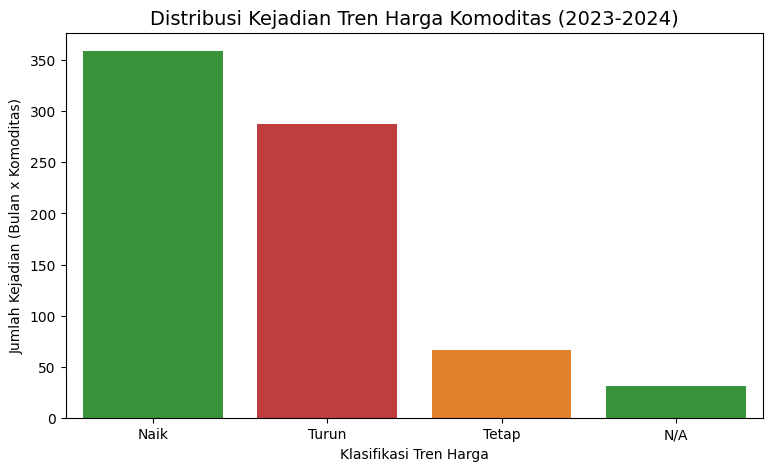

In [ ]:
# Visualisasi Pelengkap: Distribusi Tren Harga
plt.figure(figsize=(9, 5))

sns.countplot(data=df_merged, x='Tren',
              order=df_merged['Tren'].value_counts().index,
              palette=['#2ca02c', '#d62728', '#ff7f0e']) # Warna: Hijau (Naik), Merah (Turun), Oranye (Tetap)
plt.title('Distribusi Kejadian Tren Harga Komoditas (2023-2024)', fontsize=14)
plt.ylabel('Jumlah Kejadian (Bulan x Komoditas)')
plt.xlabel('Klasifikasi Tren Harga')
plt.show()

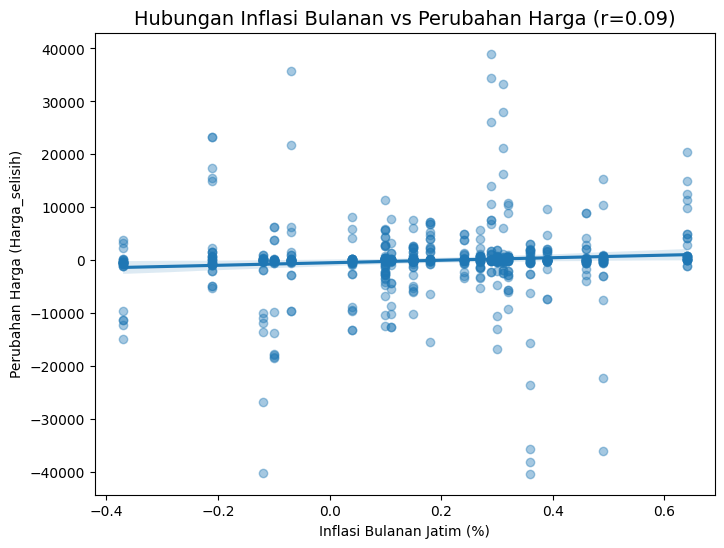

In [ ]:
# Visualisasi Hubungan (Scatter Plot)
plt.figure(figsize=(8, 6))

sns.regplot(data=df_korelasi, x='Inflasi_Bln', y='Harga_selisih', scatter_kws={'alpha':0.4})
plt.title(f'Hubungan Inflasi Bulanan vs Perubahan Harga (r={korelasi_total:.2f})', fontsize=14)
plt.xlabel('Inflasi Bulanan Jatim (%)')
plt.ylabel('Perubahan Harga (Harga_selisih)')
plt.show()

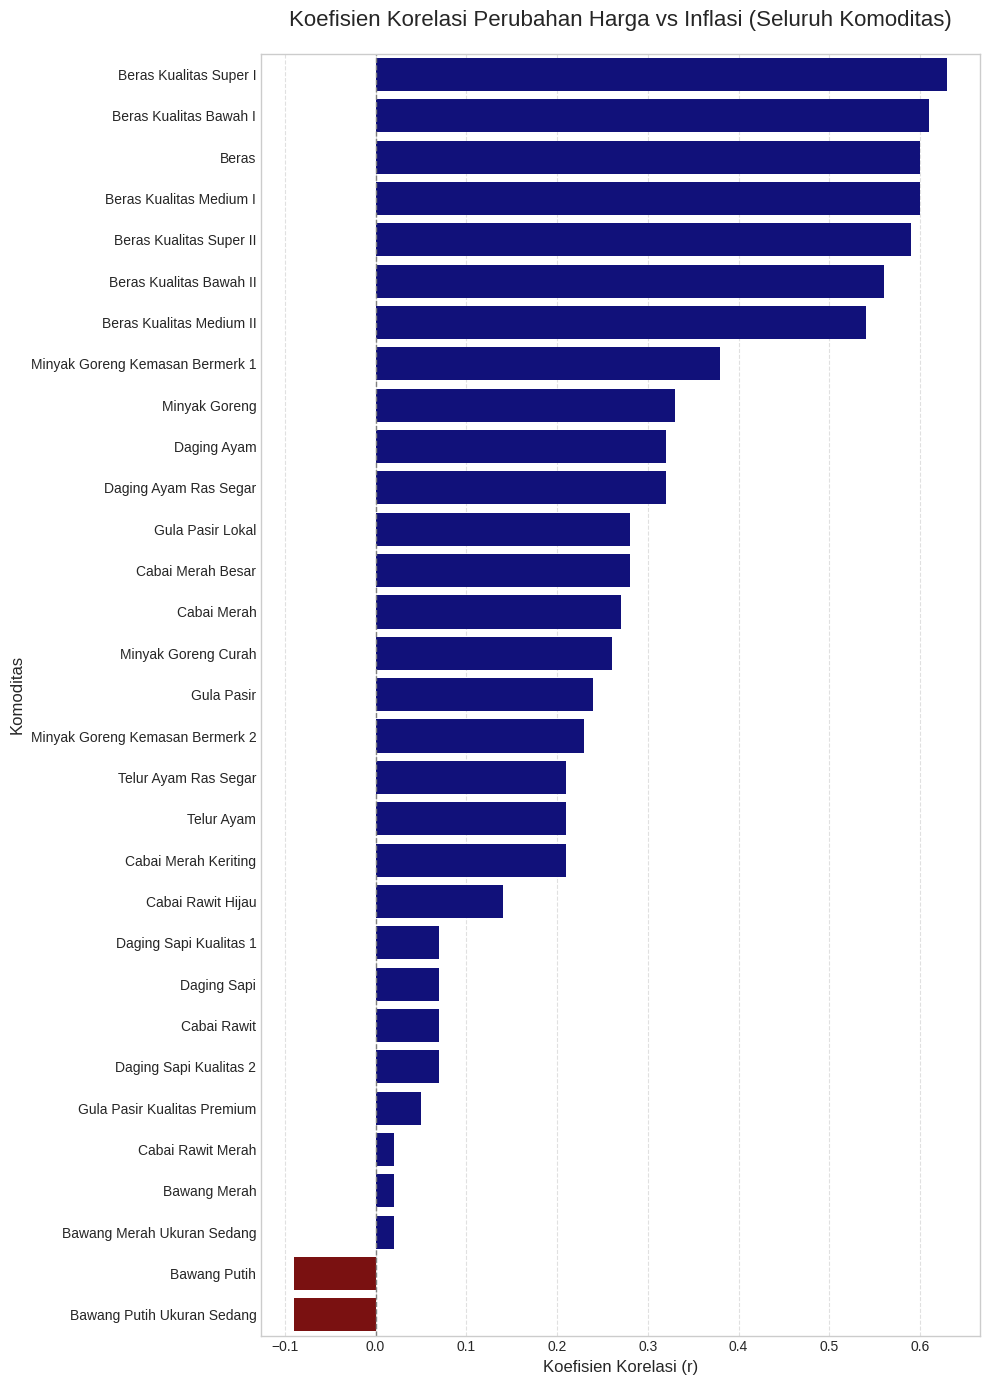

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data koefisien korelasi
data = {
    'Koef. Korelasi (r)': [
        0.63, 0.61, 0.60, 0.60, 0.59, 0.56, 0.54, 0.38, 0.33, 0.32, 0.32, 0.28, 0.28, 0.27, 0.26, 0.24,
        0.23, 0.21, 0.21, 0.21, 0.14, 0.07, 0.07, 0.07, 0.07, 0.05, 0.02, 0.02, 0.02, -0.09, -0.09
    ]
}
indeks = [
    'Beras Kualitas Super I', 'Beras Kualitas Bawah I', 'Beras', 'Beras Kualitas Medium I',
    'Beras Kualitas Super II', 'Beras Kualitas Bawah II', 'Beras Kualitas Medium II',
    'Minyak Goreng Kemasan Bermerk 1', 'Minyak Goreng', 'Daging Ayam', 'Daging Ayam Ras Segar',
    'Gula Pasir Lokal', 'Cabai Merah Besar', 'Cabai Merah', 'Minyak Goreng Curah',
    'Gula Pasir', 'Minyak Goreng Kemasan Bermerk 2', 'Telur Ayam Ras Segar',
    'Telur Ayam', 'Cabai Merah Keriting', 'Cabai Rawit Hijau', 'Daging Sapi Kualitas 1',
    'Daging Sapi', 'Cabai Rawit', 'Daging Sapi Kualitas 2', 'Gula Pasir Kualitas Premium',
    'Cabai Rawit Merah', 'Bawang Merah', 'Bawang Merah Ukuran Sedang', 'Bawang Putih',
    'Bawang Putih Ukuran Sedang'
]

df_korelasi_sorted = pd.DataFrame(data, index=indeks)



color_list = df_korelasi_sorted['Koef. Korelasi (r)'].apply(
    lambda x: 'darkblue' if x >= 0 else 'darkred'
).tolist()

num_commodities = len(df_korelasi_sorted)
plt.figure(figsize=(10, max(8, num_commodities * 0.45)))

sns.barplot(
    x=df_korelasi_sorted['Koef. Korelasi (r)'],
    y=df_korelasi_sorted.index,
    palette=color_list
)

plt.title('Koefisien Korelasi Perubahan Harga vs Inflasi (Seluruh Komoditas)', fontsize=16, pad=20)
plt.xlabel('Koefisien Korelasi (r)', fontsize=12)
plt.ylabel('Komoditas', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


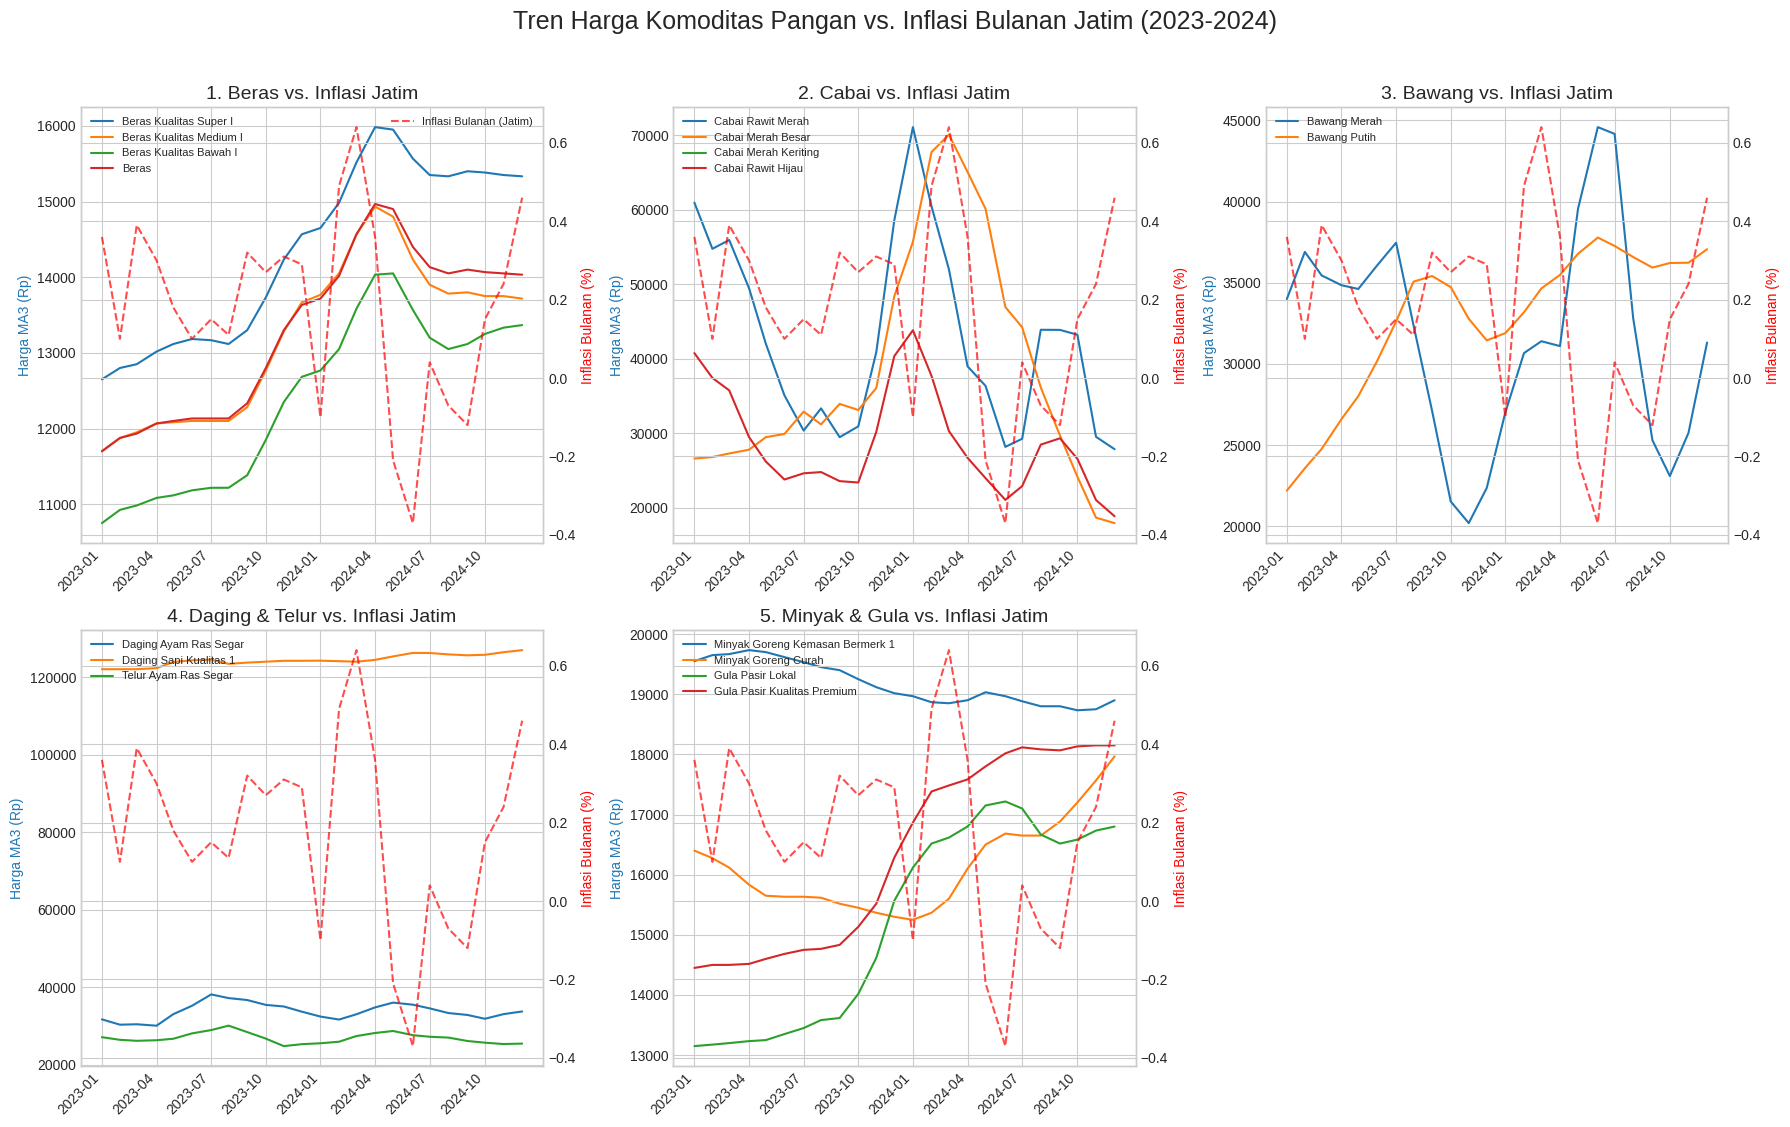

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Mengelompokkan Komoditas
komoditas_groups = {
    '1. Beras': ['Beras Kualitas Super I', 'Beras Kualitas Medium I', 'Beras Kualitas Bawah I', 'Beras'],
    '2. Cabai': ['Cabai Rawit Merah', 'Cabai Merah Besar', 'Cabai Merah Keriting', 'Cabai Rawit Hijau'],
    '3. Bawang': ['Bawang Merah', 'Bawang Putih'],
    '4. Daging & Telur': ['Daging Ayam Ras Segar', 'Daging Sapi Kualitas 1', 'Telur Ayam Ras Segar'],
    '5. Minyak & Gula': ['Minyak Goreng Kemasan Bermerk 1', 'Minyak Goreng Curah', 'Gula Pasir Lokal', 'Gula Pasir Kualitas Premium'],
}

df_inflasi = df_merged.drop_duplicates(subset=['Tanggal'])[['Tanggal', 'Inflasi_Bln']]

# Hitung jumlah subplots yang dibutuhkan
num_plots = len(komoditas_groups)
cols = 3
rows = int(np.ceil(num_plots / cols))

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(rows, cols, figsize=(18, 5.5 * rows))
axes = axes.flatten()

# Label Tanggal 3 Bulanan
date_range = df_merged['Tanggal'].unique()
date_range_dt = pd.to_datetime(date_range)

quarterly_indices = np.arange(0, len(date_range_dt), 3)
quarterly_dates = date_range_dt[quarterly_indices]
quarterly_labels = quarterly_dates.strftime('%Y-%m')


# Matriks Plot
for i, (group_name, komoditas_list) in enumerate(komoditas_groups.items()):
    ax = axes[i]

    # Plot Harga Moving Average 3 Bulan
    for kom in komoditas_list:
        df_temp = df_merged[df_merged['Komoditas'] == kom]
        ax.plot(df_temp['Tanggal'], df_temp['Harga_MA3'], label=kom)

    # Inflasi Bulanan pada sumbu Y sekunder
    ax2 = ax.twinx()
    ax2.plot(df_inflasi['Tanggal'], df_inflasi['Inflasi_Bln'],
             color='red', linestyle='--', label='Inflasi Bulanan (Jatim)', alpha=0.7)

    # Judul dan Label
    ax.set_title(f'{group_name} vs. Inflasi Jatim', fontsize=14)
    ax.set_ylabel('Harga MA3 (Rp)', color='C0')
    ax2.set_ylabel('Inflasi Bulanan (%)', color='red')

    ax.legend(loc='upper left', fontsize=8)
    if i == 0:
        ax2.legend(loc='upper right', fontsize=8)

    # label X (Tanggal) per 3 bulan
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(quarterly_dates)
    ax.set_xticklabels(quarterly_labels, rotation=45, ha='right')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Tren Harga Komoditas Pangan vs. Inflasi Bulanan Jatim (2023-2024)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1.0])
plt.show()

In [ ]:
# Heatmap Korelasi Antar Komoditas dan Inflasi
df_pivot_harga = df_korelasi.pivot_table(index=['Tahun', 'Bulan'], columns='Komoditas', values='Harga_selisih')
df_inflasi = df_korelasi[['Tahun', 'Bulan', 'Inflasi_Bln']].drop_duplicates()
df_pivot_harga = df_pivot_harga.merge(
    df_inflasi,
    on=['Tahun', 'Bulan'],
    how='left'
)


df_pivot_harga.set_index(['Tahun', 'Bulan'], inplace=True)

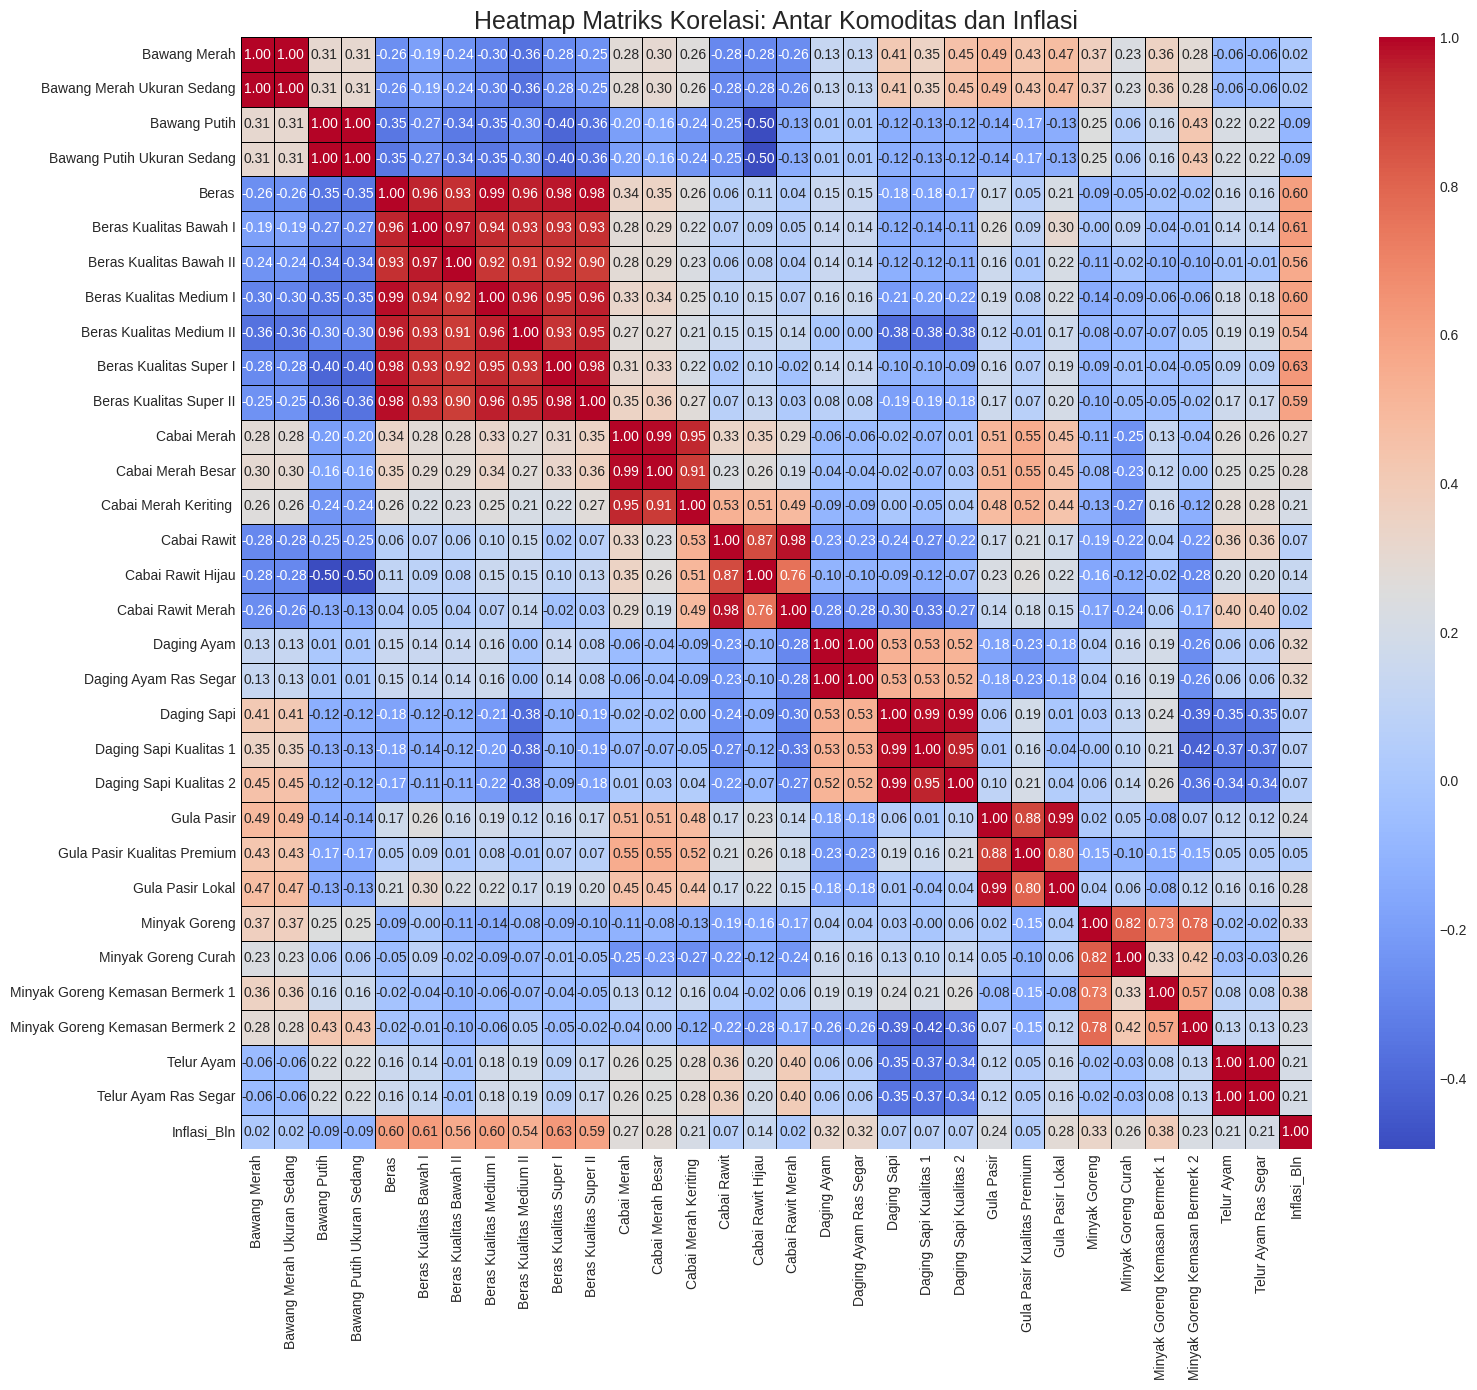

In [ ]:
correlation_matrix_full = df_pivot_harga.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix_full,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    linecolor='black'
)
plt.title('Heatmap Matriks Korelasi: Antar Komoditas dan Inflasi', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Publishing Data

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

nama_folder = 'Data Bersih'
folder_tujuan = os.path.join('/content/drive/MyDrive/Dataset', nama_folder)

if not os.path.exists(folder_tujuan):
    print(f"Folder tujuan '{folder_tujuan}' tidak ditemukan. Harap periksa nama folder di Drive Anda.")
else:
    print(f"Folder tujuan ditemukan: {folder_tujuan}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder tujuan ditemukan: /content/drive/MyDrive/Dataset/Data Bersih


In [ ]:
# Data Hasil Cleaning Harga Pangan
output_pangan = os.path.join(folder_tujuan, "Data_Cleaned_Inflasi.csv")
df_inflasi.to_csv(output_pangan, index=False, encoding='utf-8')
print(f"Data cleaned harga pangan berhasil disimpan ke: {os.path.abspath(output_pangan)}")

# Data Hasil Cleaning Infasi
output_Inflasi = os.path.join(folder_tujuan, "Data_Cleaned_Harga_Pangan.csv")
df_long.to_csv(output_Inflasi, index=False, encoding='utf-8')
print(f"Data cleaned harga pangan berhasil disimpan ke: {os.path.abspath(output_Inflasi)}")

# Data Hasil Integrasi
output_cleaned = os.path.join(folder_tujuan, "Data_Hasil_Integrasi.csv")
df_merged.to_csv(output_cleaned, index=False, encoding='utf-8')
print(f"Data hasil cleaned berhasil disimpan ke: {os.path.abspath(output_cleaned)}")

# Data Hasil Feature Engineering
file_wrangling = os.path.join(folder_tujuan, "Data_Hasil_Feature_Engineering.csv")
df_merged.to_csv(file_wrangling, index=False, encoding='utf-8')
print(f"Data Hasil Feature Engineering disimpan ke: {file_wrangling}")

# Hasil Analisis Korelasi Volatilitas
file_analisis = os.path.join(folder_tujuan, "Hasil_Analisis_Korelasi_Volatilitas.csv")
df_tampilan.to_csv(output, index=False, encoding='utf-8')
print(f"Hasil Analisis Akhir berhasil disimpan ke: {file_analisis}")

Data cleaned harga pangan berhasil disimpan ke: /content/drive/MyDrive/Dataset/Data Bersih/Data_Cleaned_Inflasi.csv
Data cleaned harga pangan berhasil disimpan ke: /content/drive/MyDrive/Dataset/Data Bersih/Data_Cleaned_Harga_Pangan.csv
Data hasil cleaned berhasil disimpan ke: /content/drive/MyDrive/Dataset/Data Bersih/Data_Hasil_Integrasi.csv
Data Hasil Feature Engineering disimpan ke: /content/drive/MyDrive/Dataset/Data Bersih/Data_Hasil_Feature_Engineering.csv
Hasil Analisis Akhir berhasil disimpan ke: /content/drive/MyDrive/Dataset/Data Bersih/Hasil_Analisis_Korelasi_Volatilitas.csv
